<a href="https://colab.research.google.com/github/Vayansh/Digit_recognition/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Getting Dataset and prepare it for preprocessing**

### **1.1 Importing Libraries**

In [ ]:
!pip install tqdm

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
import pandas as pd
import os

### **1.2 Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  Unzipping dataset
!unzip "/content/drive/MyDrive/digit_image_dataset.zip"

## **1.3 Forming DataFrame of filepaths and labels**

**Displaying a sample image of dataset**

In [ ]:
dataset = "/content/digit_image_dataset/Dataset"
img = cv.imread(dataset+"/5/0.png",0)
print(img.shape)

(100, 100)


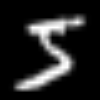

In [ ]:
cv2_imshow(img)

In [ ]:
IMG_SIZE = (100,100)        # target size of image

In [ ]:
# building a dataframe of filepaths and labels so as to input to a Image data generator
df = []
for i in range(0,10):
  folder = f"{i}"
  path = os.path.join(dataset,folder)
  for j in os.listdir(path):
    dic = {'filepath': os.path.join(dataset,folder,f"{j}") , 'label': f"{i}"}
    df.append(dic)
folder = f"_"
path = os.path.join(dataset,folder)
for j in os.listdir(path):
    dic = {'filepath': os.path.join(dataset,folder,f"{j}") , 'label': "_"}
    df.append(dic)
df = pd.DataFrame(df)
df.head()

,filepath,label
0,/content/digit_image_dataset/Dataset/0/19.png,0
1,/content/digit_image_dataset/Dataset/0/166.png,0
2,/content/digit_image_dataset/Dataset/0/261.png,0
3,/content/digit_image_dataset/Dataset/0/318.png,0
4,/content/digit_image_dataset/Dataset/0/307.png,0


In [ ]:
# Resuffling the dataset
df = df.sample(frac = 1)

In [ ]:
df.head(20)

,filepath,label
2610,/content/digit_image_dataset/Dataset/5/424.png,5
314,/content/digit_image_dataset/Dataset/0/317.png,0
5203,/content/digit_image_dataset/Dataset/_/311.png,_
5286,/content/digit_image_dataset/Dataset/_/262.png,_
3886,/content/digit_image_dataset/Dataset/7/328.png,7
943,/content/digit_image_dataset/Dataset/1/340.png,1
458,/content/digit_image_dataset/Dataset/0/467.png,0
2261,/content/digit_image_dataset/Dataset/4/451.png,4
3150,/content/digit_image_dataset/Dataset/6/372.png,6
2150,/content/digit_image_dataset/Dataset/4/372.png,4


In [ ]:
# Checking balancing of dataset
df['label'].value_counts()

5    500
0    500
_    500
7    500
1    500
4    500
6    500
3    500
8    500
2    500
9    500
Name: label, dtype: int64

Quite Balanced

# **2. Dataset Preprocessing**

## **2.1 Splitting of dataset**

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

### 2.1.1 Splitting dataset into training and testing

In [ ]:
train_X, test_X = train_test_split(df,test_size = 0.2,random_state=21)

### 2.1.2 Further Splitting training dataset into training and validation

In [ ]:
train_X, val_X = train_test_split(train_X,test_size=0.2,random_state = 21)

## **2.2 Image Data generator**

### 2.2.1 Training Image Data Generator

In [ ]:
generator = ImageDataGenerator(validation_split = 0)
train_generator = generator.flow_from_dataframe(train_X,directory=None,  target_size = (100,100), class_mode = 'categorical',
                                                x_col = 'filepath' , y_col= 'label',batch_size=32)

Found 3520 validated image filenames belonging to 11 classes.


### 2.2.2 Testing Image Data Generator

In [ ]:
test_generator = generator.flow_from_dataframe(test_X,directory=None,  target_size = (100,100), class_mode = 'categorical',
                                                x_col = 'filepath' , y_col= 'label',batch_size=1)

Found 1100 validated image filenames belonging to 11 classes.


### 2.2.3 Validation Image Data Generator

In [ ]:
val_generator = generator.flow_from_dataframe(val_X , target_size = (100,100), class_mode = 'categorical',
                                              x_col = 'filepath' , y_col = 'label' , batch_size = 1)

Found 880 validated image filenames belonging to 11 classes.


### 2.2.4 Generator Testing

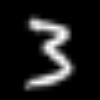

In [ ]:
cv2_imshow(train_generator[0][0][0])

In [ ]:
train_generator[0][1][0]   # True Y of above image

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **3. Model**

## **3.1 Model Creation**

In [ ]:
from keras.models import Sequential
from keras.activations import relu,linear
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, InputLayer

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(Conv2D(64,(5,5),activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(11,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 dropout (Dropout)           (None, 94, 94, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 16)        9232      
                                                                 
 dropout_1 (Dropout)         (None, 45, 45, 16)        0         
                                                        

In [ ]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics= ['accuracy'])

## **3.2 Model Fitting**

In [ ]:
model.fit(train_generator,validation_data = val_generator ,epochs = 14)

Epoch 1/14
110/110 [==============================] - 19s 66ms/step - loss: 1.7942 - accuracy: 0.7875 - val_loss: 0.3266 - val_accuracy: 0.9159
Epoch 2/14
110/110 [==============================] - 6s 53ms/step - loss: 0.2224 - accuracy: 0.9384 - val_loss: 0.2022 - val_accuracy: 0.9398
Epoch 3/14
110/110 [==============================] - 7s 64ms/step - loss: 0.1282 - accuracy: 0.9580 - val_loss: 0.1896 - val_accuracy: 0.9432
Epoch 4/14
110/110 [==============================] - 6s 56ms/step - loss: 0.0974 - accuracy: 0.9670 - val_loss: 0.2073 - val_accuracy: 0.9364
Epoch 5/14
110/110 [==============================] - 7s 64ms/step - loss: 0.0716 - accuracy: 0.9764 - val_loss: 0.2182 - val_accuracy: 0.9307
Epoch 6/14
110/110 [==============================] - 7s 60ms/step - loss: 0.0686 - accuracy: 0.9770 - val_loss: 0.1992 - val_accuracy: 0.9466
Epoch 7/14
110/110 [==============================] - 7s 59ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.1956 - val_accuracy: 0.942

## **3.3 Model Saving**

In [ ]:
model.save('model-1.h5')

In [ ]:
model.load('model-1.h5')

# **4. Testing of Model**

## **4.1 1st test**

### Testing Image

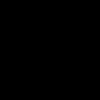

In [ ]:
cv2_imshow(test_generator[2][0][0])

### Testing Image Shape

In [ ]:
test_generator[2][0][0].shape

(100, 100, 3)

### True Output

In [ ]:
np.argmax(test_generator[2][1][0])   # 10 means blank image or non digit image

10

### Predictions

In [ ]:
np.argmax(model.predict(np.resize(test_generator[2][0][0],(1,100,100,3)),verbose = 0))

10

## **4.2 2nd test**

### Testing Image

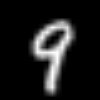

In [ ]:
cv2_imshow(test_generator[20][0][0])

### Testing Image Shape

In [ ]:
test_generator[20][0][0].shape

(100, 100, 3)

### True Output

In [ ]:
np.argmax(test_generator[20][1][0])   # 10 means blank image or non digit image

9

### Predictions

In [ ]:
np.argmax(model.predict(np.resize(test_generator[20][0][0],(1,100,100,3)),verbose = 0))

9

## **4.3 3rd test**

### Testing Image

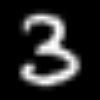

In [ ]:
cv2_imshow(test_generator[49][0][0])

### Testing Image Shape

In [ ]:
test_generator[49][0][0].shape

(100, 100, 3)

### True Output

In [ ]:
np.argmax(test_generator[49][1][0])   # 10 means blank image or non digit image

3

### Predictions

In [ ]:
np.argmax(model.predict(np.resize(test_generator[49][0][0],(1,100,100,3)),verbose = 0))

3

## **4.4 4th test**

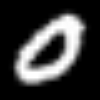

In [ ]:
cv2_imshow(test_generator[90][0][0])

In [ ]:
test_generator[90][0][0].shape

(100, 100, 3)

In [ ]:
np.argmax(model.predict(np.resize(test_generator[90][0][0],(1,100,100,3)),verbose = 0))

0

## **4.5 Getting Accuracy Score on Testing Dataset**

In [ ]:
from tqdm import tqdm

### Getting predictions on testing dataset

In [ ]:
y_pred = []
for i in tqdm(range(0,1100)):
  y_pred.append(np.argmax(model.predict(np.resize(test_generator[i][0][0],(1,100,100,3)),verbose = 0)))

100%|██████████| 1100/1100 [01:00<00:00, 18.22it/s]


### True Output of Testing dataset

In [ ]:
y_test = []
for i in tqdm(range(0,1100)):
  y_test.append(np.argmax(test_generator[i][1][0]))

100%|██████████| 1100/1100 [00:00<00:00, 2753.89it/s]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.94


# **Shap Explainer**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 11.4 MB/s eta 0:00:00


In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
test_generator[0][0][0].shape

(100, 100, 3)

In [ ]:
X_test = []
for i in range(4):
  X_test.append(test_generator[i][0][0])

In [ ]:
X_test = np.array(X_test)

In [ ]:
masker = shap.maskers.Image("inpaint_telea", X_test[0].shape)
class_labels = [0,1,2,3,4,5,6,7,8,9,'_']
explainer = shap.Explainer(model, masker, output_names=class_labels)

explainer

In [ ]:
shap_values = explainer(X_test, outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape

Partition explainer: 5it [00:17,  8.69s/it]


(4, 100, 100, 3, 5)

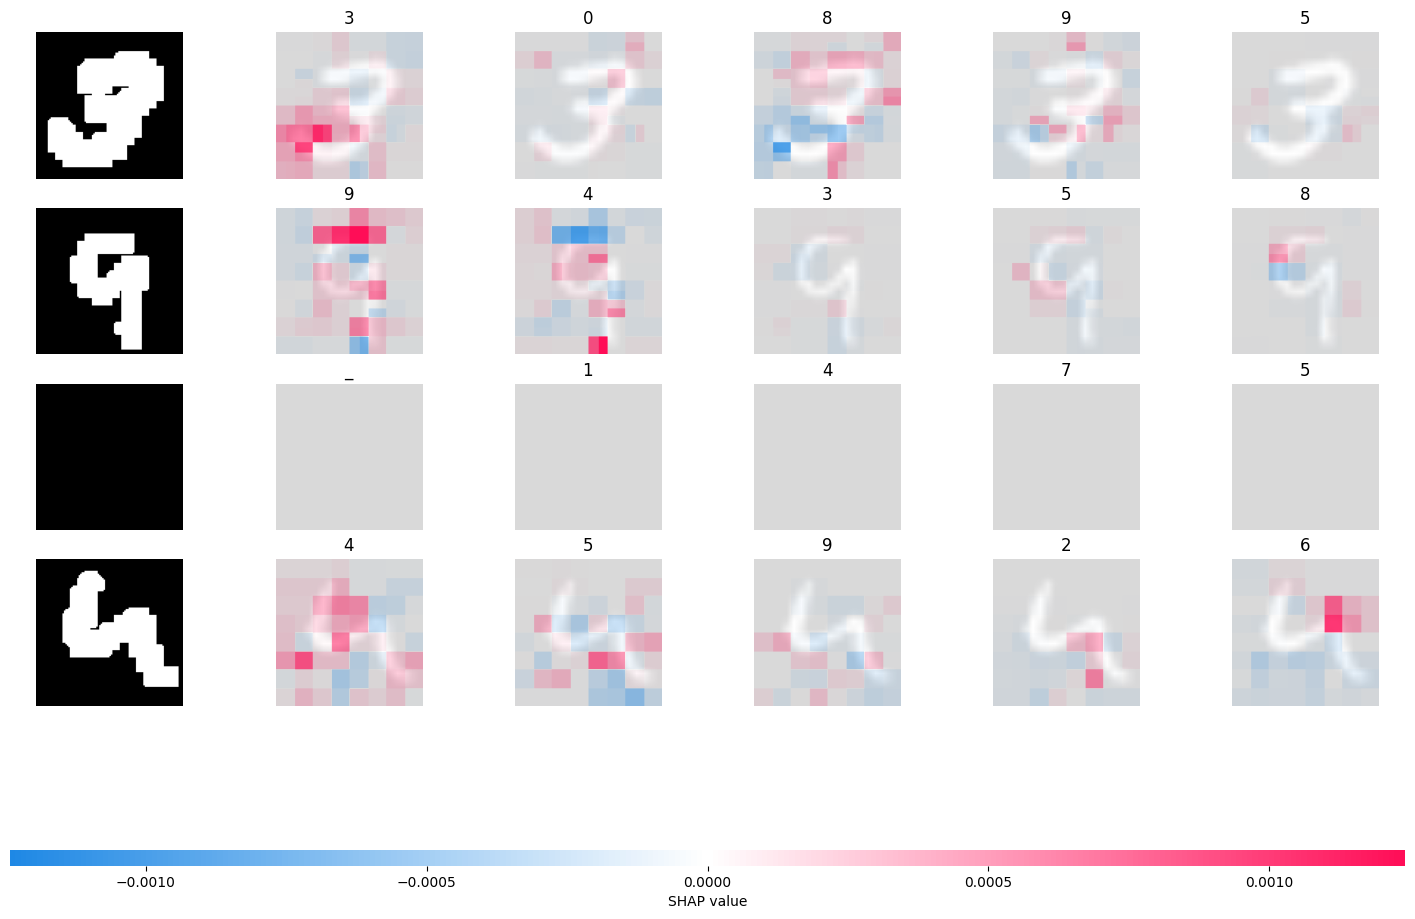

In [ ]:
shap.image_plot(shap_values)